# Keras No Supervisado

# 1.Importación librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2.Importación fuente de datos

In [2]:
#Lectura datos históricos
df = pd.read_csv('./Mall_Customers.csv',encoding = "ISO-8859-1",delimiter=',')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# 3.Análisis de Datos (EDA) + Preprocesado

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## 3.1 Limpieza inicial

In [5]:
df.isnull().sum() #Verificamos si hay valores nulos en alguna columna del dataframe

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
#Eliminar variables que tienen un alto porcentaje de registros con el valor nulo
df_var = df.isnull().sum() #Creamos una serie de pandas con el número de valores nulos de cada variable
porcentaje_eliminacion = 0.2 #20%
df_var = df_var[df_var<porcentaje_eliminacion*len(df)] #Nos quedamos con las variables que tienen menos de un porcentaje de registros nulos
lista_variables_OK = df_var.index #Nos quedamos con el índice de la serie (los nombres de las variables de interés)
df = df[lista_variables_OK] #Filtramos el dataframe original y nos quedamos solo con las columnas de interés
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
#Registros que tienen algún valor erróneo --> Eliminar / Interpolar / Correlar con otras variables para asignar el promedio en base a la variable con mayor correlación
#df.dropna(inplace=True)
df.isnull().sum() #Verificamos si hay valores nulos en alguna columna del dataframe

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
#Eliminamos CustomerID puesto que es solo un índice
df=df.drop("CustomerID", axis=1)

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


## 3.2 Visualización

### 3.2.1 Plots básicos

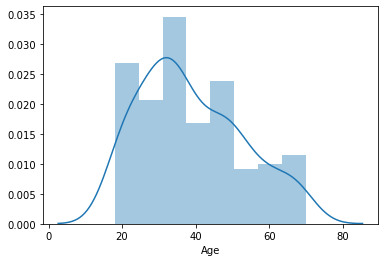

In [10]:
sns.distplot(df["Age"])

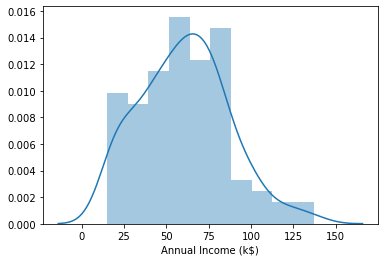

In [11]:
sns.distplot(df["Annual Income (k$)"],norm_hist=True)

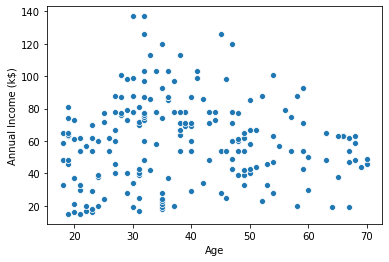

In [12]:
#¿Existe correlación entre la edad y los ingresos anuales?
sns.scatterplot(data=df,x="Age",y="Annual Income (k$)")

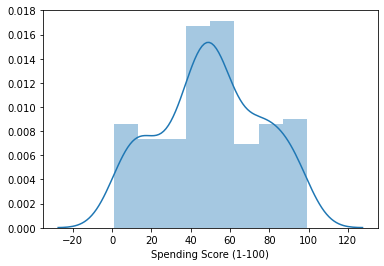

In [13]:
sns.distplot(df["Spending Score (1-100)"],norm_hist=True)

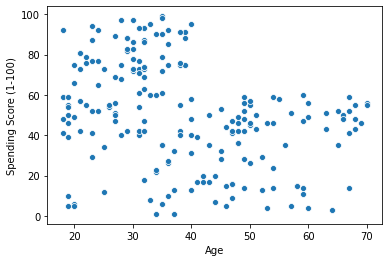

In [14]:
#¿Existe correlación entre la edad y el comportamiento de gasto?
sns.scatterplot(data=df,x="Age",y="Spending Score (1-100)")

(10.0, 0.0)

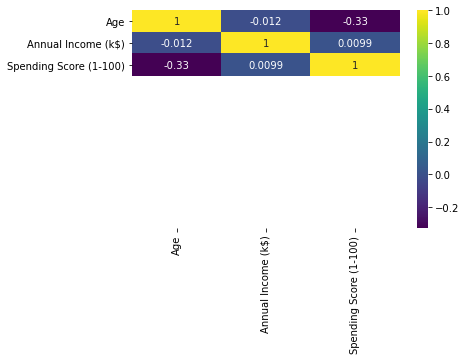

In [15]:
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.ylim(10, 0)
#En caso de que haya un error al aplicar el método corr() sobre un dataframe por el hecho de que haya columnas no numéricas (depende de la versión de la librería Pandas), lo más sencillo es aplicar el método con la opción numeric_only=True:
#df.corr(numeric_only = True)

### 3.2.2 Plot geográficos

In [18]:
# Visualizar la información geográfica si estuviera completa, el ejemplo que hay a continuación proviende de una 
# fuente de datos alternativa: https://www.kaggle.com/harlfoxem/housesalesprediction
#plt.figure(figsize=(12,8))
#sns.scatterplot(x='price',y='long',data=df)
#plt.figure(figsize=(12,8))
#sns.scatterplot(x='price',y='lat',data=df)
#plt.figure(figsize=(12,8))
#sns.scatterplot(x='long',y='lat',data=df,hue='price') #Representación con poco rango dinámico de colores debido a los outliers
#len(df)*(0.01) #número de muestras que sería el 1% de nuestros datos
#non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:] #estaríamos quitando el 1% de valores outliers
#plt.figure(figsize=(12,8))
#sns.scatterplot(x='long',y='lat',
#                data=non_top_1_perc,hue='price',
#                palette='RdYlGn',edgecolor=None,alpha=0.2) 

### 3.2.3 Otras variables

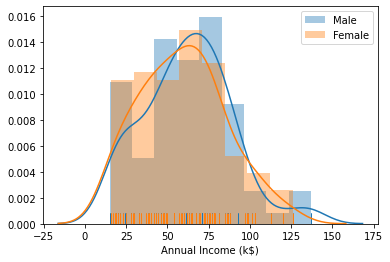

In [16]:
#¿Existe alguna diferencia en los ingresos anuales entre hombre y mujer?
sns.distplot(df[df["Gender"]=="Male"]["Annual Income (k$)"],rug=True,norm_hist=True,label="Male")
sns.distplot(df[df["Gender"]=="Female"]["Annual Income (k$)"],rug=True,norm_hist=True,label="Female")
plt.legend()

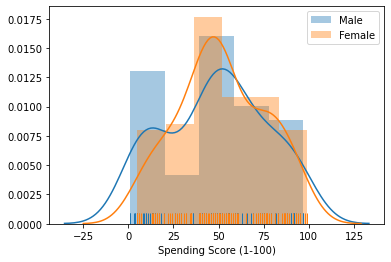

In [17]:
#¿Existe alguna diferencia en el comportamiento de gasto entre hombre y mujer?
sns.distplot(df[df["Gender"]=="Male"]["Spending Score (1-100)"],rug=True,norm_hist=True,label="Male")
sns.distplot(df[df["Gender"]=="Female"]["Spending Score (1-100)"],rug=True,norm_hist=True,label="Female")
plt.legend()

## 3.3 Limpieza final

In [21]:
# Al no tener datos etiquetados no es necesario realizar la limpieza en base a correlación con una variable objetivo

### 3.3.2 Limpieza temporal

In [22]:
#Importante visualizar la evolución temporal (si ha habido un importante cambio, quedarse con 
#la porción de datos que corresponde a la situación actual para mejorar la futura predicción)
#El ejemplo que hay a continuación proviende de una fuente de datos alternativa: https://www.kaggle.com/harlfoxem/housesalesprediction

#df['date'] = pd.to_datetime(df['date'])

#df['month'] = df['date'].apply(lambda date:date.month)

#df['year'] = df['date'].apply(lambda date:date.year)

#sns.boxplot(x='year',y='price',data=df)

#sns.boxplot(x='month',y='price',data=df)

#df.groupby('month').mean()['price'].plot()

#df.groupby('year').mean()['price'].plot()

#df = df.drop('date',axis=1) #La fecha no será una variable útil para el modelo

#df['sqft_basement'].value_counts()

In [18]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


### 3.3.3 Transformación variables categóricas

In [19]:
dummies = pd.get_dummies(df['Gender'],drop_first=True) #se puede añadir drop_first=True evita redundancia y evita crear una columna por cada variable
df_post = pd.concat([df,dummies],axis=1)
df_post = df_post.drop(['Gender'],axis=1) #Eliminamos las columnas originales

In [20]:
df_post

,Age,Annual Income (k$),Spending Score (1-100),Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


# 4. Escalado

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()

In [23]:
scaled_df = scaler.fit_transform(df_post)
scaled_df

array([[0.01923077, 0.        , 0.3877551 , 1.        ],
       [0.05769231, 0.        , 0.81632653, 1.        ],
       [0.03846154, 0.00819672, 0.05102041, 0.        ],
       [0.09615385, 0.00819672, 0.7755102 , 0.        ],
       [0.25      , 0.01639344, 0.39795918, 0.        ],
       [0.07692308, 0.01639344, 0.76530612, 0.        ],
       [0.32692308, 0.02459016, 0.05102041, 0.        ],
       [0.09615385, 0.02459016, 0.94897959, 0.        ],
       [0.88461538, 0.03278689, 0.02040816, 1.        ],
       [0.23076923, 0.03278689, 0.7244898 , 0.        ],
       [0.94230769, 0.03278689, 0.13265306, 1.        ],
       [0.32692308, 0.03278689, 1.        , 0.        ],
       [0.76923077, 0.04098361, 0.14285714, 0.        ],
       [0.11538462, 0.04098361, 0.7755102 , 0.        ],
       [0.36538462, 0.04098361, 0.12244898, 1.        ],
       [0.07692308, 0.04098361, 0.79591837, 1.        ],
       [0.32692308, 0.04918033, 0.34693878, 0.        ],
       [0.03846154, 0.04918033,

# 5.Estimación número de clusters

In [24]:
from sklearn.cluster import KMeans

In [29]:
#Estimamos la inercia para cada valor de número de clusters, mide la varianza entre los datos de un mismo cluster 
#usando la suma de RMSE

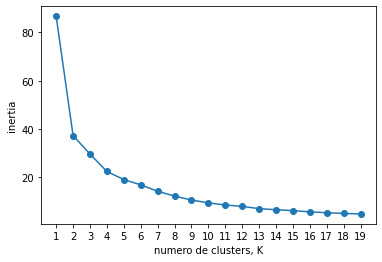

In [25]:
ks = range(1, 20)
inertias = []

for k in ks:
    # Crear instancia KMeans con k clusters: model
    model=KMeans(n_clusters=k)
    
    # Entrenar el modelo con nuestros datos
    model.fit(scaled_df)
    
    # Añadir el atributo de inercia a la lista de inercias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('numero de clusters, K')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [31]:
#Alternativa: Verificar el resultado de la silueta (Valor entre -1 y +1 que indica la similitud de cada dato con su
#propio cluster comparado con otros clusters, a mayor valor mejor resultado de cohesión)

In [27]:
from sklearn.metrics import silhouette_score

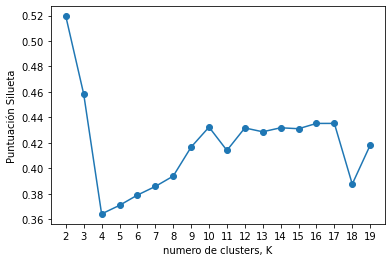

In [28]:
#Exploramos el valor de "silueta" con diferente número de clusters
siluetas = []
ks = range(2, 20)
for num_clusters in ks:
    clusterer = KMeans(n_clusters=num_clusters)
    preds = clusterer.fit_predict(scaled_df)
    score = silhouette_score (scaled_df, preds, metric='euclidean')
    siluetas.append(score)
    #print ("For n_clusters = {}, Kmeans silhouette score is {})".format(num_clusters, score))
    
plt.plot(ks, siluetas, '-o')
plt.xlabel('numero de clusters, K')
plt.ylabel('Puntuación Silueta')
plt.xticks(ks)
plt.show()

In [29]:
num_clusters = 2

# 6.Creación del modelo    

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [30]:
scaled_df.shape

(200, 4)

In [ ]:
#Podemos usar los escalones en base a num_variables_entrada y num_clusters. Creamos un encoder 4 (núm variables) --> 3 --> 2 (si el número de variables de entrada es mayor los saltos de neuronas también lo serán)
#encoder = Sequential()
#encoder.add(Dense(units=3,activation='relu',input_shape=[4]))
#encoder.add(Dense(units=2,activation='relu',input_shape=[3]))
#encoder.compile(loss="mse" ,optimizer=SGD(lr=1.5))

In [33]:
#La configuración genérica de autoencoders es: Encoder(500,500,2000,10)---Decoder(2000,500,500,variables_entrada)
encoder = Sequential()
encoder.add(Dense(units=500,activation='relu',input_shape=[4]))
encoder.add(Dense(units=500,activation='relu',input_shape=[500]))
encoder.add(Dense(units=2000,activation='relu',input_shape=[500]))
encoder.add(Dense(units=10,activation='relu',input_shape=[2000]))

In [34]:
decoder = Sequential()
decoder.add(Dense(units=2000,activation='relu',input_shape=[10]))
decoder.add(Dense(units=500,activation='relu',input_shape=[2000]))
decoder.add(Dense(units=500,activation='relu',input_shape=[500]))
decoder.add(Dense(units=4,activation='relu',input_shape=[500]))

In [35]:
autoencoder = Sequential([encoder,decoder])

In [36]:
autoencoder.compile(loss="mse" ,optimizer=SGD(lr=1.5))

In [37]:
encoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               2500      
_________________________________________________________________
dense_1 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_2 (Dense)              (None, 2000)              1002000   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                20010     
Total params: 1,275,010
Trainable params: 1,275,010
Non-trainable params: 0
_________________________________________________________________


In [38]:
decoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 2000)              22000     
_________________________________________________________________
dense_5 (Dense)              (None, 500)               1000500   
_________________________________________________________________
dense_6 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 2004      
Total params: 1,275,004
Trainable params: 1,275,004
Non-trainable params: 0
_________________________________________________________________


# 7. Entrenamiento del modelo

In [39]:
autoencoder.fit(x=scaled_df,
                y=scaled_df,
                epochs=20,
                batch_size=128)

Epoch 1/20
2/2 [==============================] - 0s 14ms/step - loss: 0.2620
Epoch 2/20
2/2 [==============================] - 0s 19ms/step - loss: 0.1326
Epoch 3/20
2/2 [==============================] - 0s 17ms/step - loss: 0.1184
Epoch 4/20
2/2 [==============================] - 0s 16ms/step - loss: 0.1188
Epoch 5/20
2/2 [==============================] - 0s 19ms/step - loss: 0.1092
Epoch 6/20
2/2 [==============================] - 0s 15ms/step - loss: 0.1126
Epoch 7/20
2/2 [==============================] - 0s 17ms/step - loss: 0.1134
Epoch 8/20
2/2 [==============================] - 0s 15ms/step - loss: 0.1029
Epoch 9/20
2/2 [==============================] - 0s 17ms/step - loss: 0.1066
Epoch 10/20
2/2 [==============================] - 0s 37ms/step - loss: 0.1032
Epoch 11/20
2/2 [==============================] - 0s 20ms/step - loss: 0.1268
Epoch 12/20
2/2 [==============================] - 0s 16ms/step - loss: 0.0764
Epoch 13/20
2/2 [==============================] - 0s 18ms/st

# 8. Evaluación del modelo

## 8.1 Predicción de cluster

In [40]:
kmeans = KMeans(n_clusters=num_clusters, n_init=20) #n_init es el número de iteraciones que realiza KMeans con diferentes centroides
y_pred = kmeans.fit_predict(encoder.predict(scaled_df))

In [41]:
y_pred

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1])

In [42]:
df["Segmento cliente"]=y_pred

In [43]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Segmento cliente
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,0
3,Female,23,16,77,1
4,Female,31,17,40,0
...,...,...,...,...,...
195,Female,35,120,79,1
196,Female,45,126,28,1
197,Male,32,126,74,1
198,Male,32,137,18,0


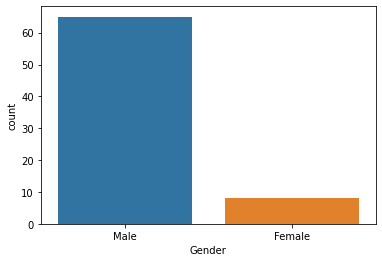

In [44]:
#Visualizamos el cluster 0 respecto al género
filtered_df=df[df["Segmento cliente"]==0]
sns.countplot(data=filtered_df,x=filtered_df["Gender"])

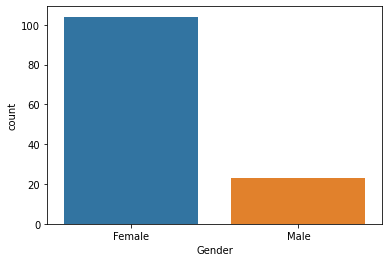

In [45]:
#Visualizamos el cluster 1 respecto al género
filtered_df=df[df["Segmento cliente"]==1]
sns.countplot(data=filtered_df,x=filtered_df["Gender"])

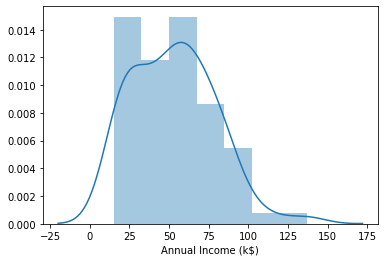

In [46]:
#Visualizamos el cluster 0 respecto al salario anual
filtered_df=df[df["Segmento cliente"]==0]
sns.distplot(filtered_df["Annual Income (k$)"],norm_hist=True)

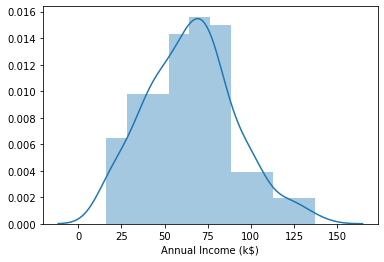

In [47]:
#Visualizamos el cluster 1 respecto al salario anual
filtered_df=df[df["Segmento cliente"]==1]
sns.distplot(filtered_df["Annual Income (k$)"],norm_hist=True)

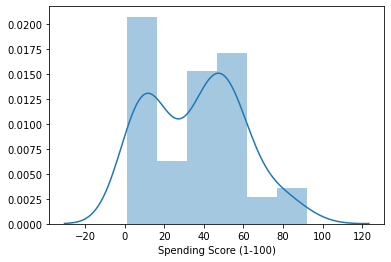

In [48]:
#Visualizamos el cluster 0 respecto al comportamiento de gasto
filtered_df=df[df["Segmento cliente"]==0]
sns.distplot(filtered_df["Spending Score (1-100)"],norm_hist=True)

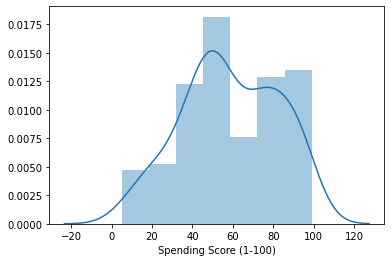

In [49]:
#Visualizamos el cluster 1 respecto al comportamiento de gasto
filtered_df=df[df["Segmento cliente"]==1]
sns.distplot(filtered_df["Spending Score (1-100)"],norm_hist=True)

Podemos decir que el segmento de cliente 1 está enfocado en mujeres con un comportamiento de gasto elevado